In [1]:
import os
import pickle
import numpy as np
from matplotlib.pylab import plt

# from src.hamiltonian_operations import *

%matplotlib widget

In [2]:
test_id = 'test_2'
direc = os.getcwd() + f'/data/{test_id}/'
     
with open(direc + 'output_lyapunov.pkl', 'rb') as f:
    out = pickle.load(f)
with open(direc + 'periods.pkl', 'rb') as f:
    periods = pickle.load(f)


In [3]:
out[18][0:2000:100, 3]

array([ 3.92262015e-04,  3.71309916e-04,  3.14516276e-04,  2.27773117e-04,
        1.19576185e-04,  1.95972773e-07, -1.19202523e-04, -2.27452860e-04,
       -3.14280222e-04, -3.71181752e-04, -3.92255785e-04, -3.74901917e-04,
       -3.20279116e-04, -2.33400483e-04, -1.22774660e-04,  4.24130984e-07,
        1.23579392e-04,  2.34079654e-04,  3.20764992e-04,  3.75148143e-04])

In [4]:
for key in out.keys():
    if out[key] is not None:
        ntimesteps = len(out[key][:, 0])
        break

time_histories = {}
relevant_indices = [index for index, value in enumerate(out.values()) if value is not None]
for key in relevant_indices:
    time_histories[key] = np.linspace(0, periods[key], ntimesteps)

### Getting the output and the time histories as an array

In [5]:
#time_histores_arr = np.array(list(time_histories.items()))
#out_arr = np.array(list(out.items()))

In [6]:
list(out.items())[0][1].shape

(2000, 42)

In [7]:
time_histories_arr = np.array([list(time_histories.items())[i][1] for i in range(len(time_histories.keys()))]).T #2000, 175

In [8]:
time_histories_arr.shape

(2000, 175)

In [9]:
out_arr = np.array([list(out.items())[i][1][:, 0:6] for i in relevant_indices]).T # coord, 2000, 175

In [10]:
out_arr.shape 

(6, 2000, 175)

## Plotting

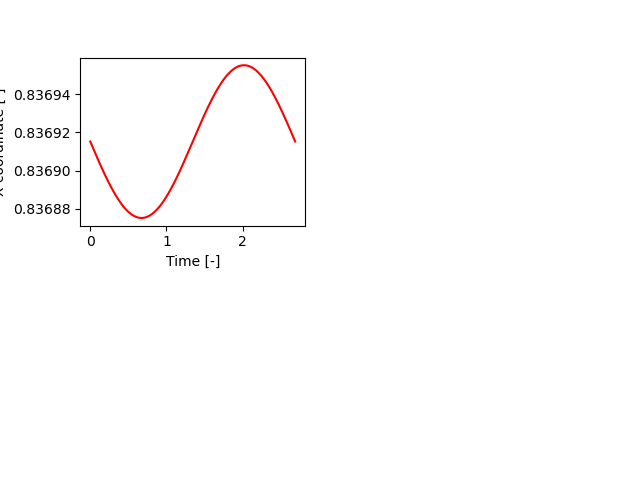

In [11]:
fig_name = f'{test_id}_xovert'

# Custom colors
cmap = plt.get_cmap('flag') #rainbow, viridis
indices = np.linspace(0, cmap.N, len(relevant_indices))
my_colors = [cmap(int(i)) for i in indices]


fig = plt.figure()
coords = ["X", "Y", "PX", "PY"]
for coord in range(len(coords)): # Number of coordinates
    ax = fig.add_subplot(len(coords) // 2 ,len(coords) - len(coords) // 2,coord+1)
    ax.set_xlabel('Time [-]')
    ax.set_ylabel(f'{coords[coord]} coordinate [-]')
    ax.set
    it = 0
    for i in relevant_indices:
        ax.plot(time_histories[i], out[i][:, coord], c=my_colors[it])
        it += 1
        break
    break

#plt.show()
save_fig=False
if save_fig:
    direc = os.getcwd() + '/figures/'
    fig.savefig(direc + f'{fig_name}.png', dpi=300)

## Pysr

In [12]:
from pysr import PySRRegressor

model = PySRRegressor(
    niterations=1000,  # < Increase me for better results
    elementwise_loss="myloss(x, y) = abs(x - y)^2",
    binary_operators=["+", "*", "-", "/", "^"],
    unary_operators=[
        "cos",
        #"exp",
        "sin",
        #"inv(x) = 1/x",
        #"abs",
        #"log",
    ],
    variable_names = ['t']
    constraints={"pow": (9, 1), '^': (-1, 1)},
    nested_constraints={"sin": {"sin": 5, "cos": 5}, "cos": {"sin": 5, "cos": 5}},
    model_selection='accuracy',
    batching=True,
    #extra_sympy_mappings={"inv": lambda x: 1 / x},
    # ^ Define operator for SymPy as well
    #elementwise_loss="loss(prediction, target) = (prediction - target)^2",
    # ^ Custom loss function (julia syntax)
)

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [13]:
time_histories_arr.shape

(2000, 175)

In [14]:
out_input_arr = out_arr[0, : , :]

In [15]:
out_input_arr.shape

(2000, 175)

In [16]:
key = relevant_indices[0]
#model.fit(time_histories[key].reshape(-1, 1), out[key][:, 0].reshape(-1, 1))
model.fit(time_histories_arr[:, 0:5], out_input_arr[:, 0:5])

/Users/sean.cowan/miniforge3/envs/3bpy/lib/python3.13/site-packages/pysr/sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Compiling Julia backend...


[ Info: Started!



Expressions evaluated per second: 1.370e+04
Head worker occupation: 65.9%. This is high, and will prevent efficient resource usage. Increase `ncycles_per_iteration` to reduce load on head worker.
Progress: 458 / 75000 total iterations (0.611%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
2           8.050e-10  7.971e+00  y₀ = sin(0.99162)
3           8.045e-10  6.429e-04  y₀ = cos(sin(0.61771))
7           3.220e-10  2.289e-01  y₀ = 0.83688 * ((0.63225 ^ -6.8844e-05) ^ x₄)
9           2.826e-10  6.534e-02  y₀ = 0.83688 * ((cos(sin(x₀)) ^ -6.8844e-05) ^ x₂)
11          2.640e-10  3.404e-02  y₀ = ((sin(cos(sin(sin(x₀)))) ^ x₄) ^ -6.8844e-05) * 0.83688
12          1.199e-10  7.892e-01  y₀ = 0.83688 * (((cos(sin(sin(x₂))) ^ x₁) ^ -6.8844e-05) ^ x₀)
---------------------------------------------------------------------------------------------------
Best 

PySRRegressor.equations_ = [
[
	   pick     score                                          equation  \
	0        0.000000                                         0.8369152   
	1        0.232083                  (2.9555116e-5 * x3) + 0.83687645   
	2        0.171099            0.83691764 + (-3.7431717e-5 * cos(x2))   
	3        0.449047          0.83695555 + (-5.4559623e-5 / (x2 ^ x0))   
	4  >>>>  3.644833  0.8369152 + (-3.7431717e-5 * sin(2.306171 * x3))   
	
	           loss  complexity  
	0  8.044296e-10           1  
	1  3.179205e-10           5  
	2  2.679237e-10           6  
	3  1.709986e-10           7  
	4  4.467468e-12           8  
], [
	   pick      score                                           equation  \
	0         0.000000                                          0.7294301   
	1        17.816205                                    cos(0.57917184)   
	2         0.002356                       cos(-0.31604776) - 0.1135561   
	3         0.932051                  (1.5011756e-5 * x3) - -0.83689517   
	4         0.189345            (-1.9887753e-5 * cos(x4)) - -0.83691716   
	5         0.398885           (-2.466249e-5 / (x4 ^ x4)) - -0.83693206   
	6  >>>>   2.417352  (-1.9887753e-5 * sin(x3 / 0.4263897)) - -0.836...   
	
	           loss  complexity  
	0  1.155305e-02           1  
	1  2.114547e-10           2  
	2  2.104608e-10           4  
	3  8.286793e-11           5  
	4  6.857329e-11           6  
	5  4.601733e-11           7  
	6  4.102786e-12           8  
], [
	   pick     score                                           equation  \
	0        0.000000                                         0.83691543   
	1        0.228783                    0.8368736 + (x3 * 3.2260323e-5)   
	2        0.232015               0.83692163 - (4.038237e-5 * cos(x0))   
	3        0.405793           (-5.1839066e-5 / (x1 ^ x2)) + 0.83695215   
	4        3.553715   0.83691543 - (sin(2.293768 * x4) * 3.9768434e-5)   
	5        0.000941  0.83691543 + ((-3.761141e-5 * 1.2110891) * sin...   
	6        0.009954  0.83691543 + ((-3.761141e-5 * 1.2110891) * sin...   
	7  >>>>  0.274343  0.83691543 + (((-3.761141e-5 * 1.2110891) * si...   
	
	           loss  complexity  
	0  8.874991e-10           1  
	1  3.554116e-10           5  
	2  2.818180e-10           6  
	3  1.878170e-10           7  
	4  5.374974e-12           8  
	5  5.349744e-12          13  
	6  5.140928e-12          17  
	7  2.969957e-12          19  
], [
	   pick     score                                           equation  \
	0        0.000000                                          0.8369161   
	1        0.000256                                     sin(0.9916234)   
	2        0.307798                    0.8368502 + (4.6111643e-5 * x3)   
	3        0.213402               0.83692825 - (cos(x1) * 6.193668e-5)   
	4        0.424297            0.83697796 - (8.6532935e-5 / (x0 ^ x0))   
	5        4.489187     0.8369161 - (-6.29404e-5 * sin(x2 * -2.33771))   
	6  >>>>  1.633851  0.8369311 - (-6.606017e-5 * (sin(x4 * -2.33771...   
	
	           loss  complexity  
	0  2.167997e-09           1  
	1  2.167442e-09           2  
	2  8.608390e-10           5  
	3  6.954124e-10           6  
	4  4.549593e-10           7  
	5  5.109086e-12           8  
	6  1.946248e-13          10  
], [
	   pick     score                                           equation  \
	0        0.000000                                          0.8369153   
	1        0.233463                     0.8368279 + (6.531901e-5 * x4)   
	2        0.206887              (-8.246462e-5 * cos(x0)) + 0.83693194   
	3        0.370117           (-0.00012431339 / (x2 ^ x2)) + 0.8370122   
	4        4.425481   0.8369153 + (-9.526044e-5 * sin(x1 / 0.4237529))   
	5  >>>>  0.000345  0.8369153 + (-9.526044e-5 * sin((x1 + ((-4.525...   
	
	           loss  complexity  
	0  4.224478e-09           1  
	1  1.660378e-09           5  
	2  1.350073e-09           6  
	3  9.324325e-10           7  
	4  1.115977e-11           8  
	5  1.112516e-11

In [17]:
ltx_expr = model.latex()

In [23]:
ltx_expr[1]

'- 1.99 \\cdot 10^{-5} \\sin{\\left(\\frac{x_{3}}{0.426} \\right)} - -0.837'

In [25]:
from IPython.display import display, Math, Latex
[display(Math(ltx_expr[i])) for i in range(len(ltx_expr))]

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

[None, None, None, None, None]

In [20]:
model.predict(time_histories_arr[:, 0:5])

array([[0.8369152 , 0.83691716, 0.83691543, 0.8369156 , 0.8369153 ],
       [0.83691508, 0.8369171 , 0.83691528, 0.83691539, 0.836915  ],
       [0.83691497, 0.83691703, 0.83691513, 0.83691519, 0.83691469],
       ...,
       [0.83691827, 0.8369167 , 0.83691228, 0.83691543, 0.8369094 ],
       [0.83691816, 0.83691664, 0.83691213, 0.83691522, 0.83690909],
       [0.83691804, 0.83691658, 0.83691198, 0.83691501, 0.83690879]])

Text(0, 0.5, 'X-coordinate [-]')

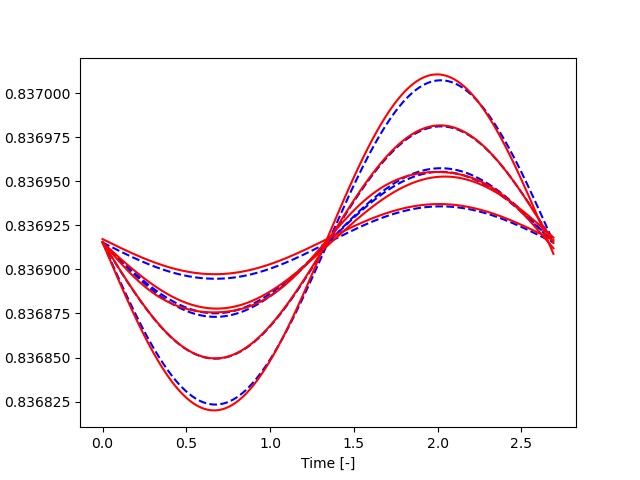

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(time_histories_arr[:, 0:5], out_input_arr[:, 0:5], label='Truth', linestyle='--', c='b')
ax.plot(time_histories_arr[:, 0:5], model.predict(time_histories_arr[:, 0:5]), label='Predicted', linestyle='-', c='r')
ax.set_xlabel('Time [-]')
ax.set_ylabel('X-coordinate [-]')
#ax.legend()